In [1]:
# 2019 KBO 타자 비교

import pandas as pd

In [2]:
file = './data/KBO_2019_player_gamestats.csv'

In [4]:
raw = pd.read_csv(file, encoding = 'cp949')

In [5]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [9]:
raw.columns

columns_select = ['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비']

data = raw[columns_select]

data.head()


,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


In [10]:
# 피벗테이블로 선수별 주요기록 정리

data_player = data.pivot_table(index = ['팀', '이름', '생일'],
                values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
                aggfunc = 'sum')
data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

<AxesSubplot:>

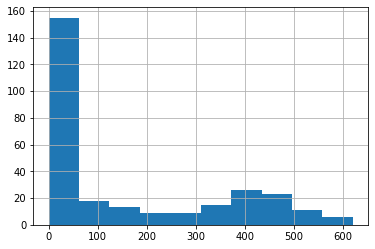

In [13]:
# 타수가 너무 낮은 사람은 제외
# 먼저 판다스에 내장된 hist()를 이용해 분포를 살펴봄

data_player['타수'].hist()

In [18]:
# 타수가 50을 넘는 사람만 보기.

cond = data_player['타수'] > 50
data_player = data_player[cond].reset_index() # reset을 이용해 멀티인덱스를 컬럼으로 변경

data_player.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2


In [19]:
# 타율 : 타격에 성공해서 진루하는 비율 = 안타 / 타수
# 출루율 : 살아서 진루하는 비율 = (안타+볼넷+사구) / (타수+볼넷+사구+희비)
# 장타율 : 타율에 진루한 베이스 가중치 = 루타 / 타수
# OPS : 출루율 + 장타율

def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] / df['장타율']
    
    return df

In [23]:
player_stat = cal_hit(data_player)
player_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.970774
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.908774
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.825198
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.977761
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.946175


In [29]:
# 각각의 기준으로 정렬

player_stat = player_stat.sort_values(by = ['출루율', '장타율', 'OPS', '타율'], ascending = False)
# 출루율을 가장 우선순위 기준으로.
player_stat = player_stat.reset_index(drop = True) # 기존 인덱스 값을 0 부터 시작하도록 초기화
player_stat.head(20)


,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,0.687264
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,0.763984
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.839348
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.851364
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.850500
5,NC,박민우,1993-02-06,203,42,9,161,471,45,1,6,0.341826,0.401515,0.430998,0.931594
6,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.398210,0.361930,1.100240
7,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.397942,0.557895,0.713292
8,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,1,0.301887,0.396825,0.339623,1.168430
9,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.396127,0.514831,0.769431


In [ ]:
################ 데이터 시각화 ###############

<AxesSubplot:xlabel='팀', ylabel='출루율'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50880 missing from c

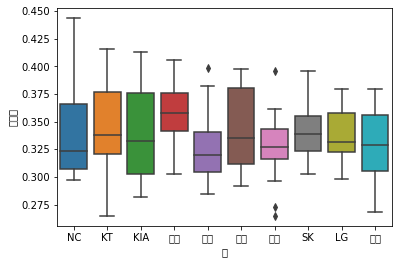

In [30]:
import seaborn as sns

sns.boxplot(data = player_stat, x = '팀', y = '출루율')

In [53]:
# seaborn, matplotlib 의 이미지에서 한글 표현하기
# 외우지말고 그냥 복붙해서 써도 됨

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지에 한글 표시 설정
if platform.system() == 'Windows': # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else :  # Mac인 경우 애플고딕
    rc('font', family='AppleGothic')

# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='팀', ylabel='출루율'>

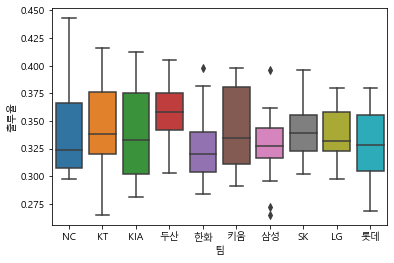

In [54]:
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

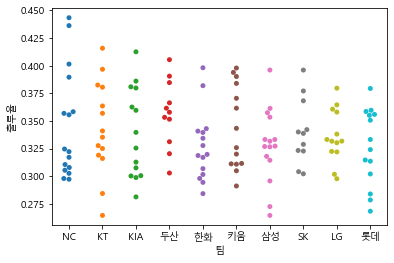

In [55]:
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

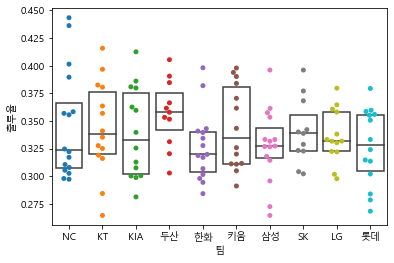

In [57]:
# boxplot 과 swarmplot 을 합치되 boxplot 심플하게 만들기

sns.boxplot(data = player_stat, x = '팀', y = '출루율',
           showcaps = False,   # 박스 상하단 가로라인 보이지 않기
           whiskerprops = {'linewidth':0},   # 박스 상하단 세로라인 보이지 않기
           showfliers = False,   # 박스 범위 벗어난 아웃라이어 점 표시하지 않기
           boxprops = {'facecolor':'None'})   # 박스 색상 지우기
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')



In [58]:
# 데이터 저장하기
# encoding = 'cp949' 옵션으로 엑셀에서도 열리도록
# index = False 옵션으로 0부터 시작하는 의미없는 index 저장 X

file = './data/player_stat.csv'

player_stat.to_csv(file, encoding = 'cp949', index = False)